## Environemte Class 
Defined by the number of arms and the probability distributions, it returns the reward (when pulled)

In [11]:
import numpy as np

class Environment():
    def __init__(self, n_arms, probabilities):
        self.n_arms = n_arms
        self.probabilities = probabilities

    def round(self, pulled_arm):
        return np.random.binomial(1, self.probabilities[pulled_arm])
    

In [22]:
import numpy as np 

class Learner():
    def __init__(self, n_arms):
        self.n_arms = n_arms 
        self.t = 0  #Time 
        self.rewards_per_arm = x = [[] for i in range(n_arms)]
        self.collected_rewards = []
    
    def update_observations(self, pulled_arm, reward):
        self.rewards_per_arm[pulled_arm].append(reward)
        self.collected_rewards.append(reward)

class TS_Learner(Learner):
    def __init__(self, n_arms):
        super().__init__(n_arms)
        self.beta_parameters = np.ones((n_arms, 2))

    def pull_arm(self):
        return np.argmax(np.random.beta(self.beta_parameters[: , 0], self.beta_parameters[:, 1]))

    def update(self, pulled_arm, reward):
        self.t += 1
        self.update_observations(pulled_arm, reward)
        self.beta_parameters[pulled_arm, 0] = self.beta_parameters[pulled_arm, 0] + reward
        self.beta_parameters[pulled_arm, 1] = self.beta_parameters[pulled_arm , 1] + 1 - reward


class Greedy_Learner(Learner):
    def __init__(self, n_arms):
        super().__init__(n_arms)
        self.expected_rewards = np.zeros(n_arms)

    def pull_arm(self):
        if(self.t < self.n_arms):
            return self.t
        idxs = np.argwhere(self.expected_rewards == self.expected_rewards.max()).reshape(-1)  #Get all the indxs with the maximum value
        pulled_arm = np.random.choice(idxs)
        return pulled_arm
    
    def update(self, pulled_arm, reward):
        self.t += 1
        self.update_observations(pulled_arm, reward)
        self.expected_rewards[pulled_arm] = (self.expected_rewards[pulled_arm] * (self.t -1) + reward) / self.t

In [25]:
#Comparison between the two learners: TS vs Greedy

n_arms = 4 
p = np.array([0.15 , 0.1, 0.1, 0.35])  #Last arm is the optimal one
opt = p[3]

T = 300 
n_experiment = 1000
ts_rewards_per_experiment = []
gr_rewards_per_experiment = []

for e in range(n_experiment):
    env = Environment(n_arms = n_arms, probabilities = p)
    ts_learner = TS_Learner(n_arms = n_arms)
    gr_learner = Greedy_Learner(n_arms = n_arms)
    for t in range(T):
        #TS learner 
        pulled_arm = ts_learner.pull_arm()
        reward = env.round(pulled_arm)
        ts_learner.update(pulled_arm, reward)

        #Gr learner 
        pulled_arm = gr_learner.pull_arm()
        reward = env.round(pulled_arm)
        gr_learner.update(pulled_arm, reward)
    
    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    gr_rewards_per_experiment.append(gr_learner.collected_rewards)


<ipython-input-27-367f2379b365>:8: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("TS" , "Greedy")
<ipython-input-27-367f2379b365>:8: UserWarning: Legend does not support 'S' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("TS" , "Greedy")


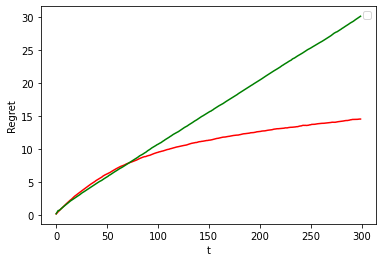

In [27]:
import matplotlib.pyplot as plt 

plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum(np.mean(opt - ts_rewards_per_experiment, axis = 0)) , 'r')
plt.plot(np.cumsum(np.mean(opt - gr_rewards_per_experiment, axis = 0)) , 'g')
plt.legend("TS" , "Greedy")
plt.show()